 ✨ **Importing Libraries**

In [23]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt


✨ **Loading Data**

In [2]:
data = pd.read_csv('data.csv')


✨ **Data Analysis** 

In [3]:
data.head()


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.isnull().sum()    # check null values 


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

 🕵️‍♀️ **Note** : Unnamed column contains Nan only so we will drop it 

In [5]:
data = data.drop(columns="Unnamed: 32" , axis =1 )   


🕵️‍♀️ **Note** : ID column is not useful for us so we will drop it 

In [6]:
data = data.drop(columns= "id" , axis  = 1 )    # drop id column


In [7]:
data.describe() # area mean , area worst


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data["diagnosis"].value_counts()


B    357
M    212
Name: diagnosis, dtype: int64

✨**Label The Target**

In [9]:


label = LabelEncoder()
labels = label.fit_transform(data['diagnosis'])

# B >> 0 , M >> 1
data['target'] = labels   # create new column

data.drop(columns='diagnosis' , axis = 1  , inplace=True)


In [10]:
data.groupby("target").mean()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [11]:
data.groupby('target').sum()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,,,,,,,,,,,,,,,,,,,,,
0,4336.309,6395.57,27872.92,165216.1,33.01452,28.59021,16.442571,9.181114,62.1844,22.44366,...,4776.589,8394.88,31061.12,199527.1,44.61054,65.21410,59.346867,26.576631,96.4778,28.36082
1,3702.120,4580.24,24457.46,207415.8,21.81448,30.77981,34.084240,18.653880,40.8967,13.28818,...,4480.580,6215.46,29970.51,301524.7,30.70719,79.46271,95.528380,38.634310,68.5752,19.40435


✨**Visualization**

<Axes: xlabel='target', ylabel='count'>

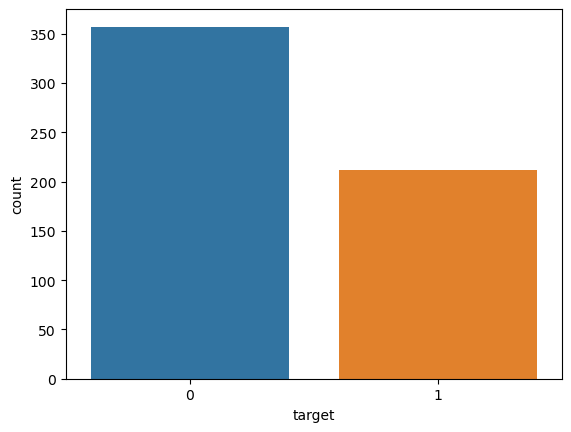

In [14]:
sns.countplot(x='target' , data = data )


**✨Split Data into X , Y**

In [15]:
X = data.drop(columns = 'target' , axis =1 )
Y  = data['target']


✨**Train Test Split**

In [16]:
x_train , x_test ,y_train , y_test = train_test_split (X,Y , test_size = 0.2 , random_state=2 )


✨**Building Neural Network**

In [17]:
import tensorflow as tf 
import keras
tf.random.set_seed(3)


🕵️‍♀️**Note** : 
-  set_seed(3) is used in TensorFlow to set the random seed for generating random numbers.
-  This ensures that the random operations in TensorFlow
- (like weight initialization, shuffling, etc.) are reproducible,
-  which means that every time the code is run, the random numbers generated will be the same.

**✨ Setting up the layers of Neural Network**


In [18]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(30,)), #(input layer)
    #This layer reshapes the input data into a 1D array.
    # It's commonly used to convert 2D or higher-dimensional input (like images) into a vector to feed into a fully connected dense layer.

    keras.layers.Dense(20, activation='relu'),  #(hidden layer)
    # Dense: This is a fully connected (dense) layer where each neuron is connected to every neuron in the previous layer.
    # 20: The layer contains 20 neurons.
    # activation='relu': The activation function for this layer is ReLU (Rectified Linear Unit). 
    # ReLU introduces non-linearity into the model and helps it learn complex patterns. 
    # ReLU outputs 0 for negative values and the input value itself for positive values, which helps with issues like the vanishing gradient problem.

    keras.layers.Dense(2, activation='sigmoid'),
    # The output layer has 2 neurons, which is the number of classes in our classification problem

])


c:\Users\Skytop\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**✨ Compiling the Neural Network**


In [19]:

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


🕵️‍♀️**Note** : 
 - Adam (Adaptive Moment Estimation) is a popular and powerful optimization algorithm
 - used to update the weights of the model based on the gradients during backpropagation.
 -  sparse_categorical_crossentropy: This is the loss function used to measure the difference between the predicted output and the true output for each training example.
- Metrics (Accuracy): Tracks the performance of the model by calculating the percentage of correct predictions.

In [20]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(x_train)

X_test_std = scaler.transform(x_test)


✨**Training Neural Network**

In [21]:
history = model.fit(X_train_std, y_train, validation_split=0.1, epochs=15)



Epoch 1/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6538 - loss: 0.6400 - val_accuracy: 0.8696 - val_loss: 0.4494
Epoch 2/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8596 - loss: 0.4033 - val_accuracy: 0.9783 - val_loss: 0.2840
Epoch 3/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9078 - loss: 0.2956 - val_accuracy: 0.9783 - val_loss: 0.2092
Epoch 4/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9277 - loss: 0.2405 - val_accuracy: 0.9783 - val_loss: 0.1721
Epoch 5/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9289 - loss: 0.2078 - val_accuracy: 0.9783 - val_loss: 0.1510
Epoch 6/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9307 - loss: 0.1855 - val_accuracy: 0.9783 - val_loss: 0.1370
Epoch 7/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9322 - loss: 0.1687 - val_accuracy: 0.9783 - val_loss: 0.1269
Epoch 8/15
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9538 - loss: 0.1554 - val_accuracy: 0.9783 - val_los

🕵️**Note** : 
 - model.fit(): This is the method that starts the training of the neural network. 
- The model will learn by iterating over the training data, adjusting its weights to minimize the loss function. 
- It returns a history object, which stores information about the training process, such as the loss and accuracy at each epoch.

- X_train_std: This is the input data used for training the model. It contains the features for each sample, 
-  and the _std indicates that this data has likely been standardized (i.e., normalized) to have a mean of 0 and a standard deviation of 1, which helps improve the convergence of the model.

-  Y_train: These are the true labels for the training data. 
-  Each label corresponds to the correct class for the associated input in X_train_std.

- validation_split=0.1: This means that 10% of the training data will be set aside as a validation set.
-  The model will train on the remaining 90%, but during training, it will periodically evaluate its performance on the 10% validation set.

-  epochs=10: The number of epochs refers to how many times the model will iterate over the entire training dataset. 
- In this case, the model will go through the training data 10 times.

✨ **Visualizing accuracy and loss**

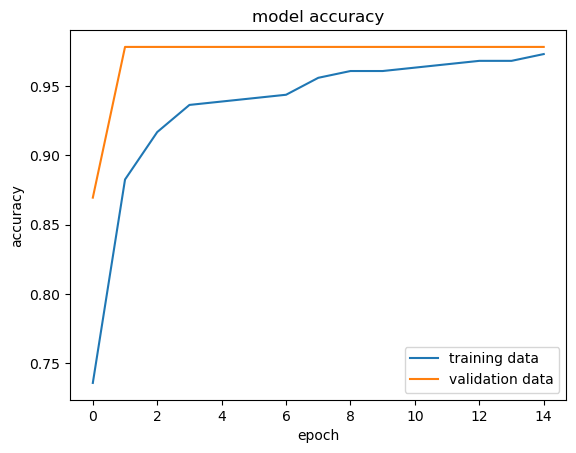

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')


✨**Note** :
- the loss function  decreasing  and accuracy increasing  
- we can increase epochs number or hidden layers so that we can increase the accuracy

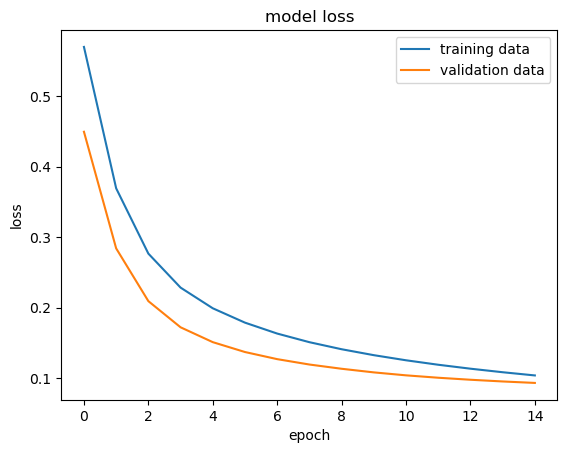

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')


**Accuracy of the model on test data**

In [26]:
loss, accuracy = model.evaluate(X_test_std, y_test)
print(accuracy)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9502 - loss: 0.1052 
0.9561403393745422


In [27]:
y_pred = model.predict(X_test_std)


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


In [28]:
print(y_pred.shape)
print(y_pred[0])   
 # 2 values for one data point  (P (Y = 0 ) AND P(Y = 1) )
# we will modify it >> if the first number is greater = class 0 either class 1 


(114, 2)
[0.64739376 0.19526003]


In [29]:
#  argmax function

my_list = [ 0.64 , 0.19]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)


[0.46, 0.23]
0


model.predict() gives the prediction probability of each class for 


In [31]:
Y_pred_labels = [np.argmax(i) for i in y_pred]
print(Y_pred_labels)


[0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]


**Y_pred_labels**: 
- This list contains the predicted class labels for each sample based on the highest probability from the model's output.
- np.argmax: Finds the index of the maximum value, which corresponds to the predicted class.

✨**Building the predictive system**

In [32]:
input_data = (11.76,21.6,74.72,427.9,0.08637,0.04966,0.01657,0.01115,0.1495,0.05888,0.4062,1.21,2.635,28.47,0.005857,0.009758,0.01168,0.007445,0.02406,0.001769,12.98,25.72,82.98,516.5,0.1085,0.08615,0.05523,0.03715,0.2433,0.06563)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('The tumor is Malignant')

else:
  print('The tumor is Benign')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[[0.8421648  0.02204067]]
[0]
The tumor is Malignant


c:\Users\Skytop\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


***Thanks ❤***
